In [77]:
import numpy as np
import pandas as pd
import seaborn as sns

In [58]:
# load embeddings
embedding_df = pd.read_csv("output/dms/embeddings/jones_esm1b_t33_650M_UR50S.csv")
embedding_df = embedding_df.rename(columns={embedding_df.columns[0]: "mutation"})
wt_embedding_df = pd.read_csv("output/dms/embeddings/jones_WT.csv")
wt_embedding_df = wt_embedding_df.iloc[:, 1:]

# load labels
labels_df = pd.read_csv("output/dms/labels/jones_labels.csv")

In [31]:
wt_array = wt_embedding_df.iloc[0][1:]

In [88]:
high_activity_mutants = labels_df[labels_df["activity_binary_95p"]==1]["variant"].to_list()

In [89]:
high_activity_embedding_df = embedding_df[embedding_df["mutation"].isin(high_activity_mutants)]

In [90]:
single_aa_delta = wt_embedding_df.iloc[0] - high_activity_embedding_df.iloc[0, 1:]
single_aa_delta = single_aa_delta.to_list()

<Axes: ylabel='Count'>

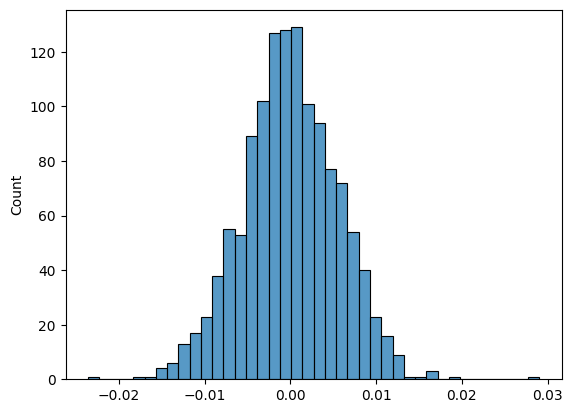

In [91]:
# plot the distribution of all delta 
sns.histplot(single_aa_delta)

In [92]:
# calculating sum of all deltas
delta_sum = [0] * 1280

for i in range(0, high_activity_embedding_df.shape[0]):
    # calculate row delta
    delta = wt_embedding_df.iloc[0] - high_activity_embedding_df.iloc[0, 1:]
    delta = delta.to_list()
    # add to sum
    #delta_sum = [a_i + b_i for a_i, b_i in zip(delta, delta_sum)]
    delta_sum = np.add(delta, delta_sum)


<function matplotlib.pyplot.show(close=None, block=None)>

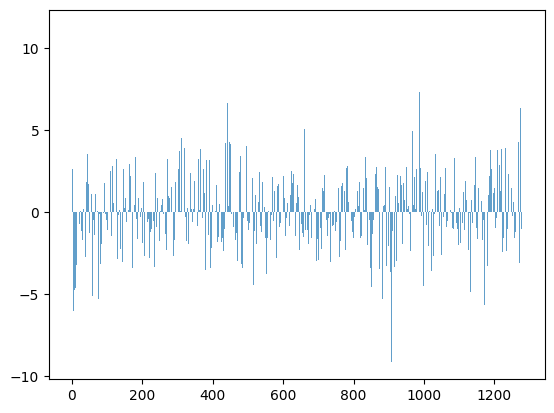

In [93]:
import matplotlib.pyplot as plt

x = range(len(delta_sum))
plt.bar(x, delta_sum, align='center', alpha=0.7)
plt.show

<Axes: ylabel='Count'>

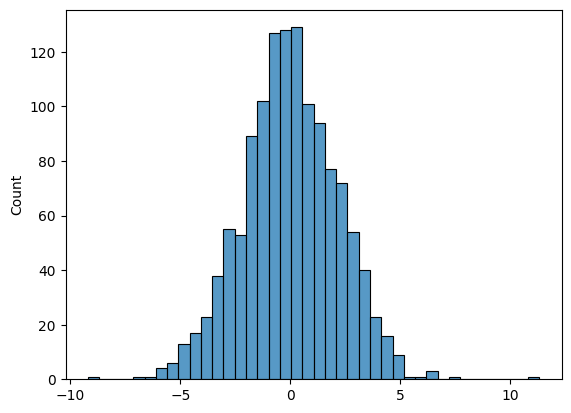

In [94]:
sns.histplot(delta_sum)